## GATE 연산 수행하는 Deep Learning 구현
### tensorflow 2.0 keras

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
%reset

# TF 2.11 버전
# GATE 연산 수행하는 Deep Learning구현

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

print(tf.__version__) # 

# Training Data Set
x_data = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=np.float32)


# XOR GATE
t_data = np.array([[0], [1], [1], [0]], dtype=np.float32) # 2차원

model = Sequential()
# model.add(Flatten(input_shape=(2, )))
model.add(Dense(100, activation='sigmoid', input_shape=(2, )))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=1e-1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_data, 
                    t_data,
                    epochs=30000,
                    verbose=0)

predict_val = model.predict(x_data) # 실수값
# print(predict_val) # 2.1.0
result = tf.cast(predict_val >= 0.5, dtype=tf.float32).numpy().ravel()

print(classification_report(t_data.ravel(), result))

dict_keys(['loss', 'accuracy'])


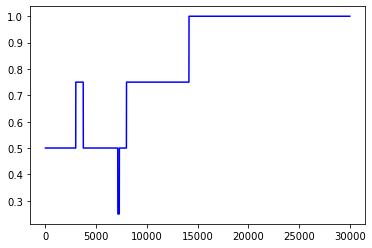

In [4]:
print(history.history.keys()) 
# dict_keys(['loss', 'accuracy'])
# epoch당 train data를 이용한 accuracy를 의미

plt.plot(history.history['accuracy'], color='b')
plt.show()